**1. Réalisez une veille sur l’outil Jupyter Notebook** et installez le sur votre machine (soit en passant par Anaconda, soit directement sur VSCode).<br>
Familiarisez vous avec les cellules de code ainsi que les cellules de Markdown.<br><br>
**2. Créez et ouvrez un notebook Jupyter.** Nommez le “Netflix Data Analysis”.<br><br>
**3. Chargez le dataset à l’aide de Pandas** sous le format d’un DataFrame<br>
**Importe** la librairie *pandas*<br>
**Importe** les données depuis le fichier csv avec la fonction *read_*<br>
**Initialise** une variable *df* qui contient l'objet dataframe<br>

In [2]:
import pandas as pd
df=pd.read_csv('netflix_titles.csv')

**4. Affiche les 5 premières entrée du dataframe** via la variable df.

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**4 bis. Affiche les 5 dernières entrée du dataframe** via la variable df.

In [7]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**5. Affichez les informations du DataFrame**<br> notamment le type d'index et
les colonnes, les valeurs non nulles et l'utilisation de la mémoire.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**6. Affiche la dimensionnalité du DataFrame.**<br>
*Variables* : Les variables sont les colonnes du DataFrame. Il y en a 12.<br>
*Observation* : Les observations sont les lignes du DataFrame. Il y en a 8807.

In [9]:
dimensions = df.shape
rows, columns = dimensions
print(rows, columns)

8807 12


**7. Affichez les colonnes du DataFrame.**


In [11]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


8. **Affichez le type des différentes colonnes du DataFrame.**

In [3]:
# méthode dtypes : affiche les types des différentes colonnes d'un DataFrame pandas
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


**Avez-vous des données quantitatives (numériques) ?**
<br>Si oui, lesquelles ?

In [22]:
# Sélection les colonnes numériques
digital_columns = df.select_dtypes(include=['int64', 'float64'])

if len(digital_columns.columns) > 0:
    print("\nColonnes numériques :\n")
    print(digital_columns)
else:
    print("\nAucune colonne numérique dans le DataFrame.\n")


Colonnes numériques :

      release_year
0             2020
1             2021
2             2021
3             2021
4             2021
...            ...
8802          2007
8803          2018
8804          2009
8805          2006
8806          2015

[8807 rows x 1 columns]


**Avez-vous des données qualitatives (catégorielles)**<br>Si oui, lesquelles ?

In [25]:
# Sélection les colonnes catégorielles
categorical_columns = df.select_dtypes(include=['object', 'bool'])


if len(categorical_columns.columns) > 0:
    print("Colonnes catégorielles :")
    print(categorical_columns)
else:
    print("Aucune colonne catégorielle dans le DataFrame.")

Colonnes catégorielles :
     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, 

**9. Y a-t-il des données manquantes ?**<br> Identifiez la proportion en
pourcentage.

In [7]:

missing_data = df.isna()

# Calculer la proportion en pourcentage
percentage_missing = missing_data.mean() * 100

# Afficher les proportions en pourcentage
print("Proportion de données manquantes en pourcentage :")
print(percentage_missing)

Proportion de données manquantes en pourcentage :
show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


**10. A l’aide de la librairie Missingno.**<br> Affichez un graphique représentatif de
la proportion des données manquantes.


In [ ]:
pip install missingno

<Axes: >

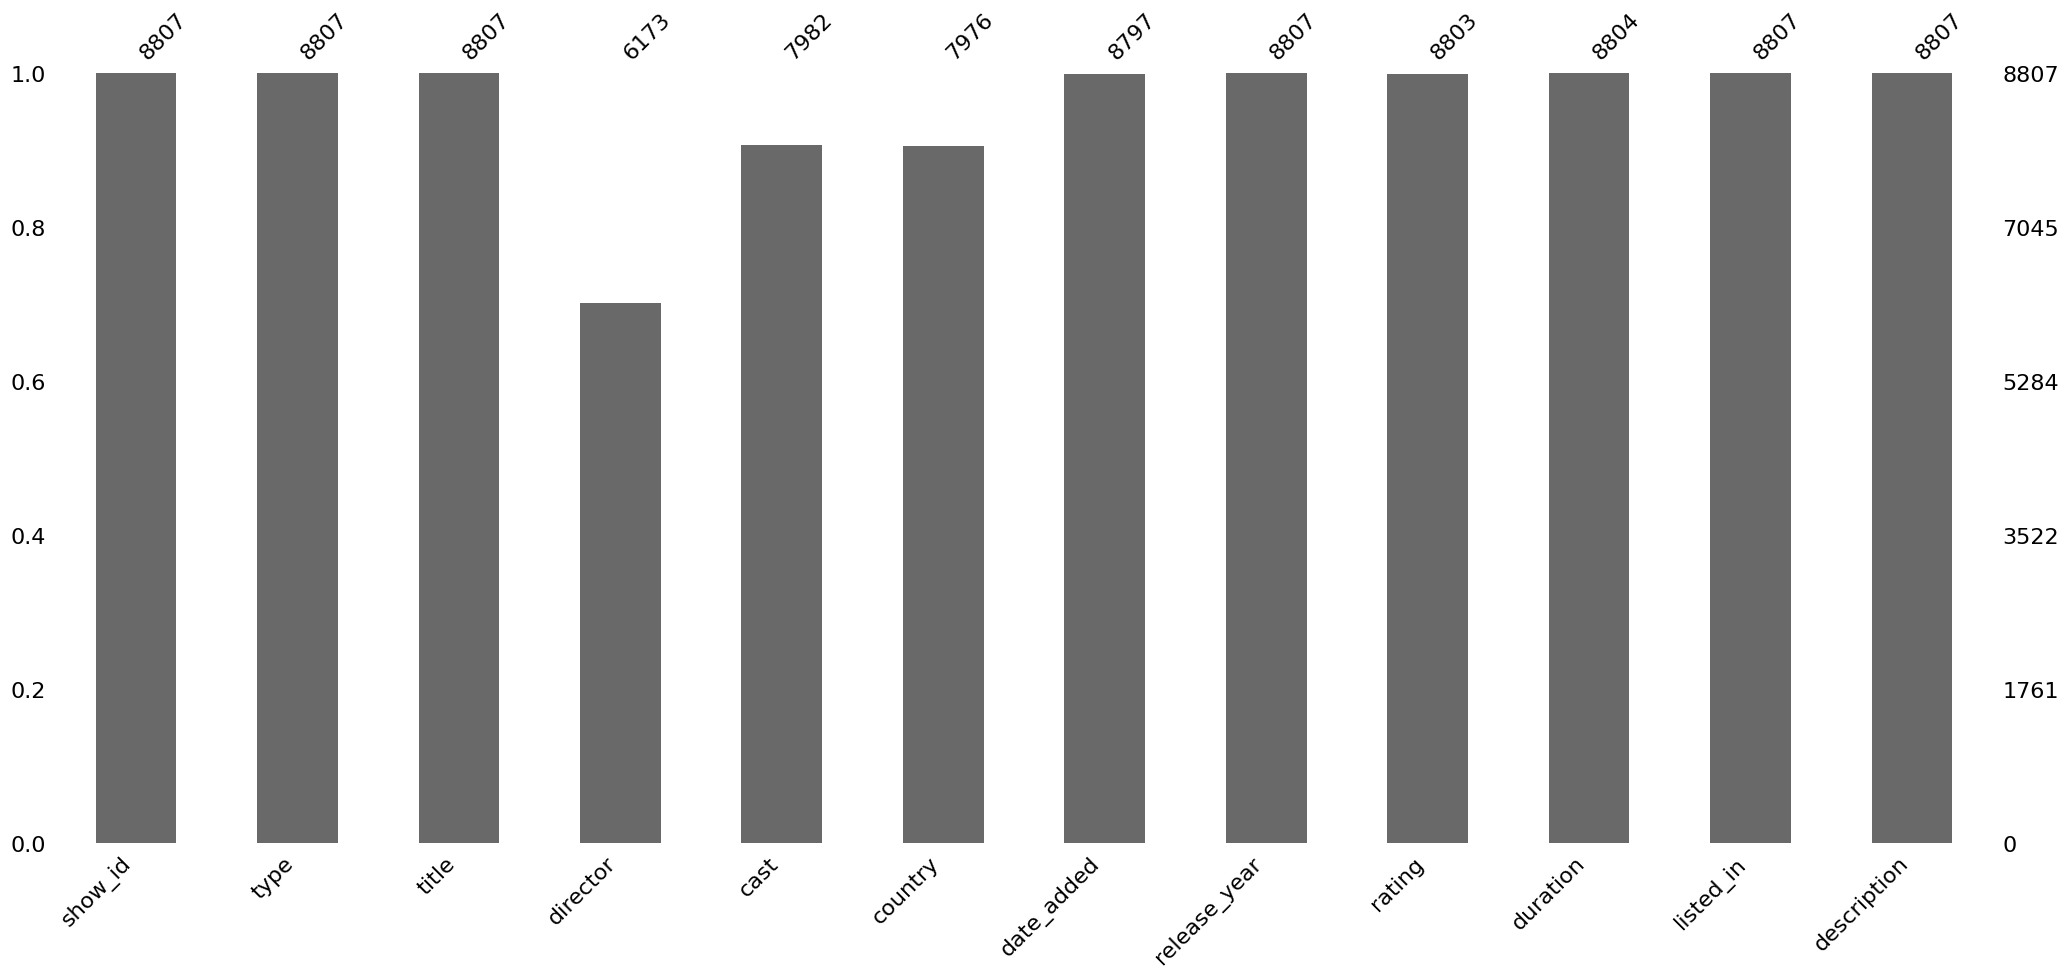

In [6]:
import missingno as msno
# Diagramme en barres
# Chaque barre symbolise une colonne du jeu de données, leur hauteur correspond au taux de valeurs non nulles dans chaque colonne.
msno.bar(df)

A gauche le pourcentage de valeurs complètes.<br>A droite les valeurs des index.<br>En haut le nombre de lignes.

<Axes: >

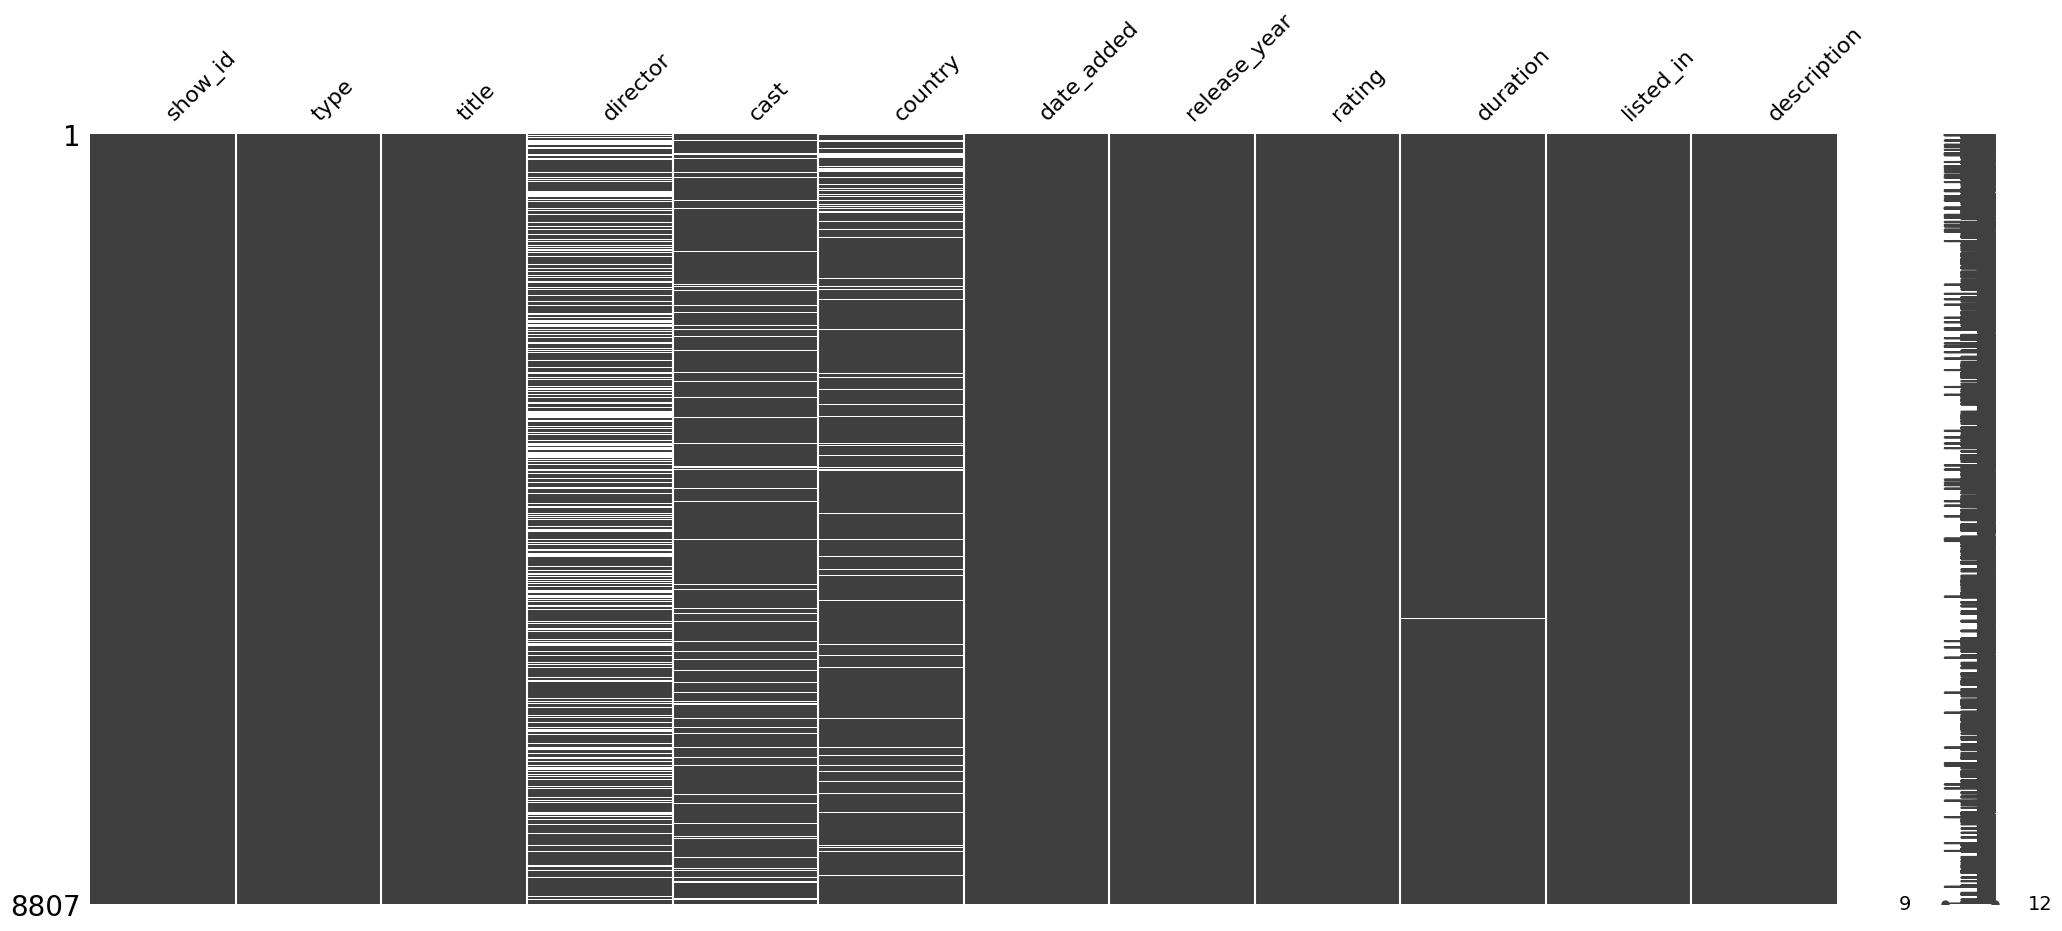

In [9]:
# Matrice de nullité
# La présence de barres blanches, plus ou moins importantes, symbolise l’absence de valeurs
msno.matrix(df)

Sur la droite de la matrice, une fine courbe qui oscille de gauche à droite.<br>La droite étant le nombre de colonnes du jeu de données, et la gauche étant donc à zéro<br>Lorsqu’une ligne donnée comporte une valeur dans chaque colonne, la courbe penchera vers la droite.<br>Si les valeurs commencent à manquer, elle penchera vers la gauche.

In [ ]:
'''Matrice de corrélation
Une valeur proche de -1 signifie que si une variable apparaît, il est très probable que l’autre variable soit manquante.
Une valeur proche de 0 signifie qu’il n’y a pas de corrélation particulière sur la présence ou non de valeurs entre deux variables.
Une valeur proche de 1 signifie que si une variable apparaît, il est très probable que l’autre variable soit présente.'''

# msno.heatmap(df)

'''Dendrogramme, diagramme en arborescence
Le dendrogramme permet de regrouper les colonnes selon leurs corrélations de nullité.
Plus les colonnes sont rapprochées, plus cette corrélation est importante (plus il y a un lien entre leur présence ou absence de valeurs).'''

# msno.dendrogram(df)

**11. Affichez une observation aléatoire du DataFrame.**

In [16]:
random = df.sample()

print(random)

     show_id     type        title director  \
7142   s7143  TV Show  Juana Brava      NaN   

                                                   cast country  \
7142  Elisa Zulueta, Alejandro Trejo, Lucas Balmaced...   Chile   

          date_added  release_year rating  duration  \
7142  March 20, 2017          2015  TV-MA  1 Season   

                                              listed_in  \
7142  International TV Shows, Spanish-Language TV Sh...   

                                            description  
7142  After many years away, a woman returns to her ...  
